# Exercise: "Human learning" with iris data
**Question:** Can you predict the species of an iris using petal and sepal measurements?

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

Data URL: http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**1. Read the iris data into a Pandas DataFrame, including column names.**

In [4]:
iris_cols = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=iris_cols)

**2. Gather some basic information about the data.**

In [5]:
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

**3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.**

In [14]:
iris.groupby('class').mean()

,sepal_len,sepal_wid,petal_len,petal_wid
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


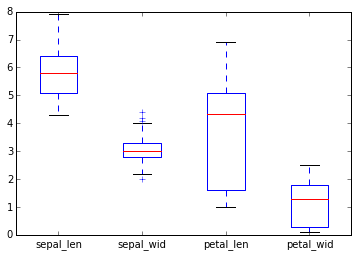

In [11]:
iris.plot(kind="box")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cbdc128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ccbf320>]], dtype=object)

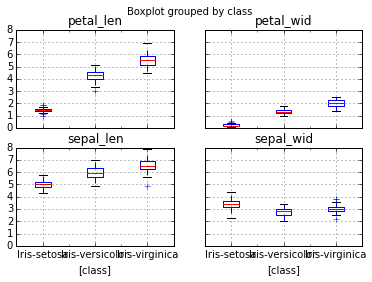

In [12]:
iris.boxplot(by='class')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d219b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d46f128>]], dtype=object)

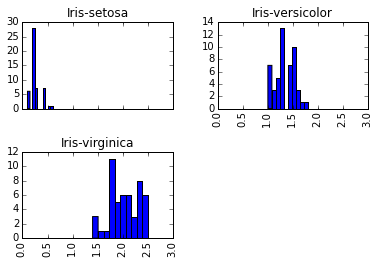

In [15]:
iris.hist(column='petal_wid', by='class', sharex=True)

**4. Write down a set of rules that could be used to predict species based on iris measurements.**

* Petal Length appears to be very different between classes, so this may be a feature that could be used to determine which class a new flower belongs to. 
* Specifically, petal length can determine whether it is class _Setosa_ or either of the other 2
* To determine between class _Versicolour_ and _Virginica_ a combination of the other three measures might be needed.
    * If the petal length _and_ petal width _and_ sepal length are larger, then it might be of class _Virginica_. Else, it is likely to be class _Versicolour_.